# Домашнее задание 4

## Задача 1
Постройте график<br>
Назовите график<br>
Сделайте именование оси x и оси y<br>
Сделайте выводы<br>

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Скачиваем данные

In [98]:
house_data_df = pd.read_csv(r'C:\temp\kc-house-data (1).csv', encoding='ISO-8859-1')
laptop_data_df = pd.read_csv(r'C:\temp\laptop_price (1).csv', encoding='ISO-8859-1')

### 1.2 Изучаем данные по стоимости недвижимости

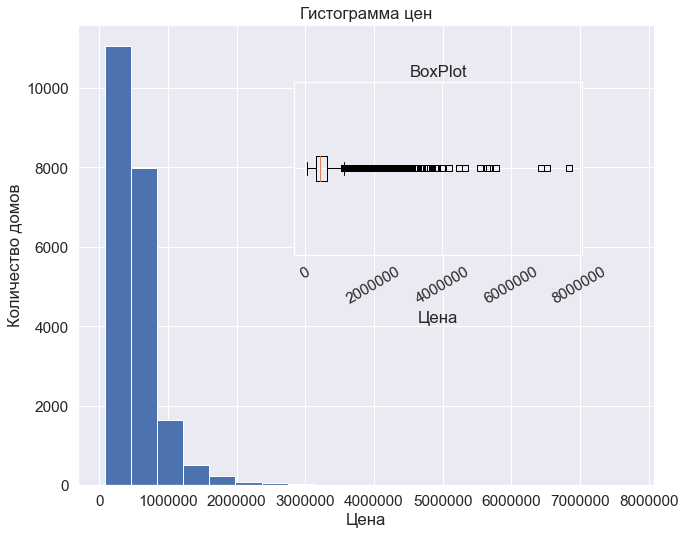

In [30]:
fig = plt.figure(figsize=(10, 8))

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.4, 0.5, 0.4, 0.3])

axes1.ticklabel_format(useOffset=False, style='plain')

axes1.set_xlabel('Цена')
axes1.set_ylabel('Количество домов')
axes1.set_title('Гистограмма цен')

axes2.set_xlabel('Цена')
axes2.tick_params(labelleft=False, rotation=30)
axes2.set_title('BoxPlot')

axes2.ticklabel_format(useOffset=False, style='plain')


axes1.hist(house_data_df['price'], bins=20)
axes2.boxplot(house_data_df['price'],0,'s',0);

## Выводы
- в Калифорнии довольно много *относительно* дешевых домов, но все они мне не по-карману.
- на удивление мало супер дорогих домов: буквально единицы все, что больше 4000000. А где же дома всех кинозвезд и воротил силиконовой долины??

### 1.3. Изучаем распределение квадратуры жилой площади

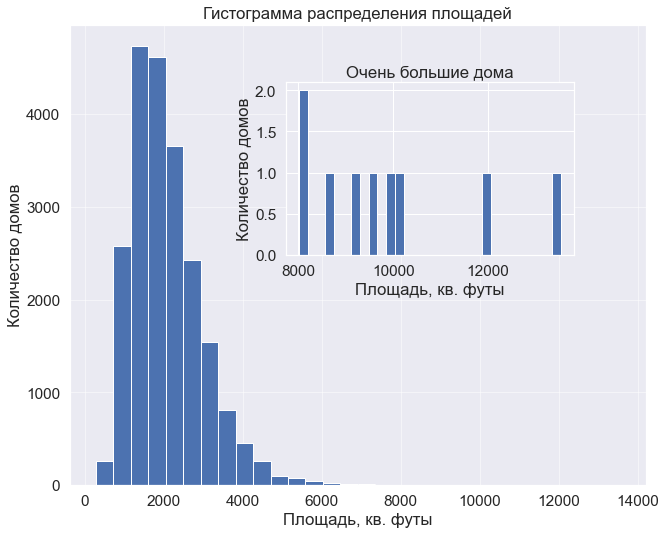

In [17]:
fig = plt.figure(figsize=(10, 8))

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.4, 0.5, 0.4, 0.3])


axes1.grid(linewidth=1, axis='both', alpha=0.5)

axes1.set_xlabel('Площадь, кв. футы')
axes1.set_ylabel('Количество домов')
axes1.set_title('Гистограмма распределения площадей')

large_houses_sub_dataseries = house_data_df[house_data_df['sqft_living'] > 8000]['sqft_living']
axes2.set_xlabel('Площадь, кв. футы')
axes2.set_ylabel('Количество домов')
axes2.set_title('Очень большие дома')


axes1.hist(house_data_df['sqft_living'], bins=30)
axes2.hist(large_houses_sub_dataseries, bins=30);

### 1.4. Изучаем распределение года постройки

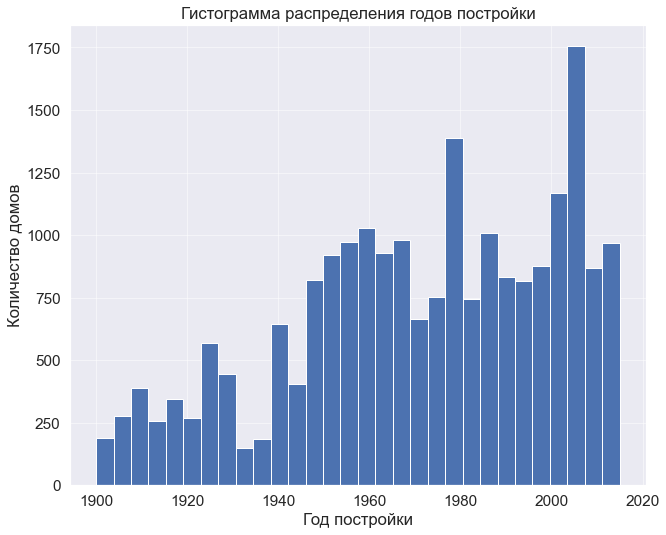

In [18]:
fig = plt.figure(figsize=(10, 8))

axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.grid(linewidth=1, axis='both', alpha=0.5)

axes.set_xlabel('Год постройки')
axes.set_ylabel('Количество домов')
axes.set_title('Гистограмма распределения годов постройки')

axes.hist(house_data_df['yr_built'], bins=30);

# Задача 2
2.1. Изучите распределение домов от наличия вида на набережную<br>
Постройте график<br>
Сделайте выводы<br>
2.2. Изучите распределение этажей домов<br>
2.3. Изучите распределение состояния домов<br>

In [19]:
data = house_data_df['waterfront'].value_counts()
data.index = ['no', 'yes']
data

no     21450
yes      163
Name: waterfront, dtype: int64

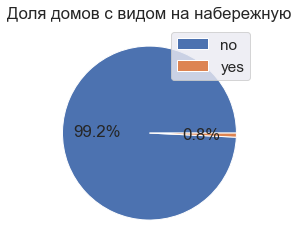

In [20]:
plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля домов с видом на набережную')
plt.legend(data.index);

In [21]:
data = house_data_df.groupby('waterfront')['price'].agg(median_price='median').reset_index()
data.index = ['Нет', 'Есть']
data

,waterfront,median_price
Нет,0,450000.0
Есть,1,1400000.0


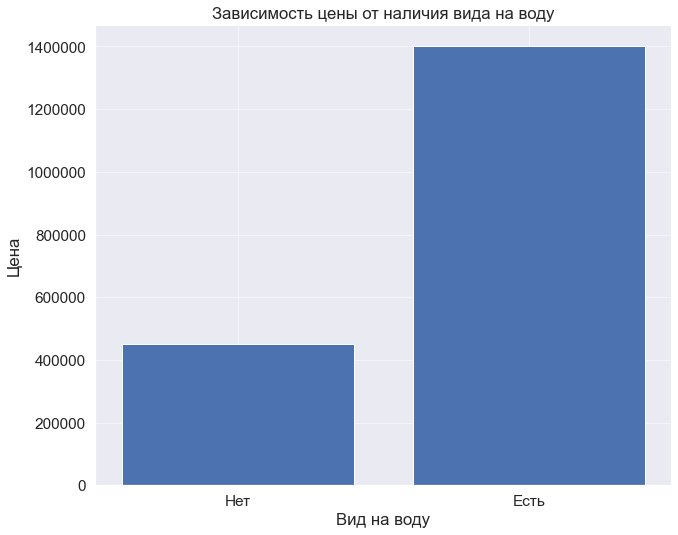

In [22]:
fig = plt.figure(figsize=(10, 8))

axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.grid(linewidth=1, axis='both', alpha=0.5)
axes.ticklabel_format(useOffset=False, style='plain')


axes.set_xlabel('Вид на воду')
axes.set_ylabel('Цена')
axes.set_title('Зависимость цены от наличия вида на воду')

axes.bar(data.index, data['median_price']);

## 2.2. Распределение этажей домов

In [25]:
data = house_data_df.groupby('yr_built')['floors'].agg(median_floors='median').reset_index()

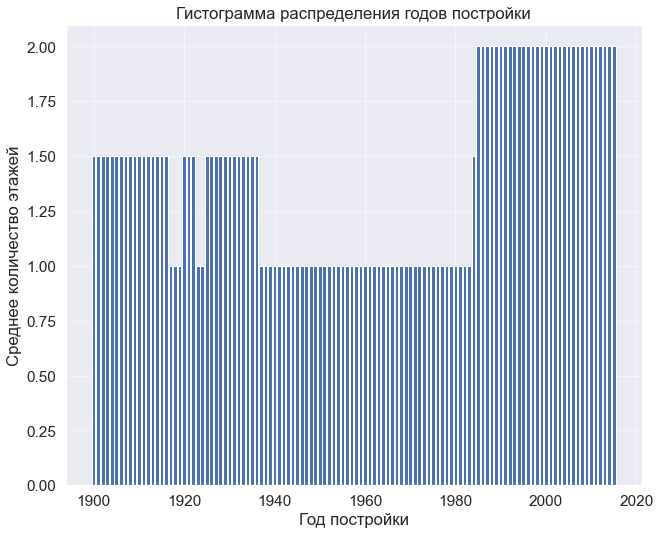

In [26]:
fig = plt.figure(figsize=(10, 8))

axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.grid(linewidth=1, axis='both', alpha=0.5)

axes.set_xlabel('Год постройки')
axes.set_ylabel('Среднее количество этажей')
axes.set_title('Гистограмма распределения годов постройки')

axes.bar(data['yr_built'], data['median_floors']);

## Выводы:
- старые дома обычно имеют от 1 до 2х этажей<br>
- вплоть до середины 80-х годов в Калифорнии строили одноэтажные "бунгало"<br>
- с 90-х и до наших дней стандарт для Калифорнии - 3 этажа для индивидуального дома.

## 2.3. Изучите распределение состояния домов

In [ ]:
sns.jointplot(y=house_data_df['price'], x=house_data_df['condition'], kind='reg');
plt.xlabel('Состояние дома')
plt.ylabel('Цена дома')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [ ]:
data = house_data_df.groupby('yr_built')['condition'].agg(median_condition='median').reset_index()

In [ ]:
plt.bar(data['yr_built'],data['median_condition'])
plt.xlabel('Год постройки')
plt.ylabel('Среднее состояние дома')
plt.title('Состояния домов в зависимости от года постройки')
plt.show();

In [ ]:
plt.hist(house_data_df['condition'])
plt.xlabel('Количество домов')
plt.ylabel('Состояние дома')
plt.title('Гистограмма состояний домов')
plt.show()

## Выводы
- больше всего домов с состоянием "3" (среднее)<br>
- плохих и очень плохих домов мало<br>
- старых домов в хорошем состоянии больше, чем новых. Очевидно, разучились строить.

# Задача 3

- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.<br>
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Для начала давайте построим матрицу корреляций, чтобы выявить факторы, влияющие на цены

In [4]:
corr_matrix = house_data_df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

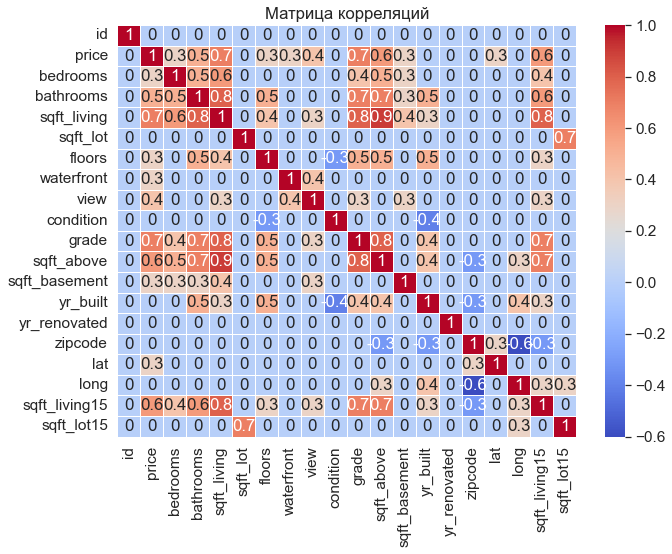

In [5]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

Проанализировав строку (или колонку) price, выявляем факторы с наибольшим влиянием на цену

In [6]:
corr_df = corr_matrix['price'].to_frame().reset_index()
corr_df.sort_values(by='price', ascending=False, inplace=True)
corr_df = corr_df[(corr_df['price'] < 1) & (abs(corr_df['price']) > 0.5)]
corr_df.rename(columns={'index': 'factor', 'price': 'influence'}, inplace=True)
corr_df

,factor,influence
10,grade,0.7
4,sqft_living,0.7
18,sqft_living15,0.6
11,sqft_above,0.6


Построим графики для более детального изучения корреляции

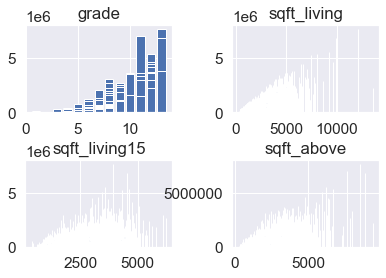

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()

for idx, axe in enumerate([axe for row in axes for axe in row]):
    factor = corr_df.iloc[idx]['factor']
    axe.set_title(factor)
    plt.ticklabel_format(useOffset=False, style='plain')
    axe.bar(house_data_df[factor], house_data_df['price'])

Рассмотрим, как общая оценка дома (grade) влияет на цену

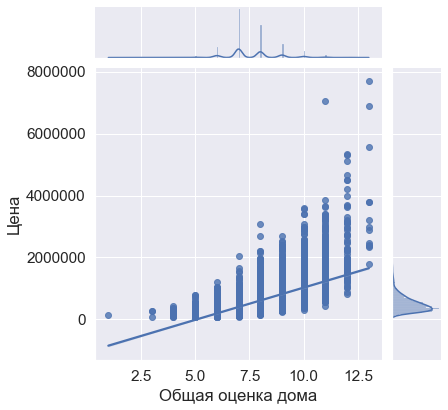

In [100]:
sns.jointplot(x=house_data_df['grade'], y=house_data_df['price'], kind='reg')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Общая оценка дома')
plt.ylabel('Цена')
plt.show()

Выводы:<br>
- ожидаемо, чем лучше дом, тем выше цена<br>
- нижняя граница цен "отзывается" медленнее на рост оценки. Т.е. можно найти лучший дом за те же деньги!
- домов с самой высокой оценкой мало, цены запредельно высоки. Вероятно, это какой-то эксклюзив.

Рассмотрим Влияние общей площади на цену дома

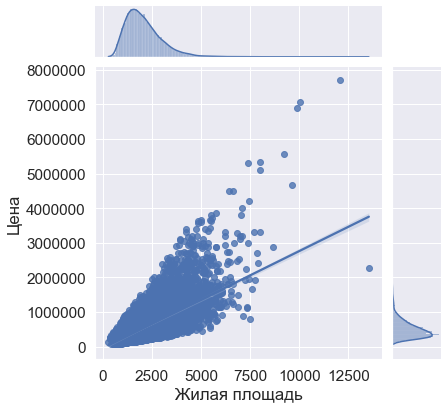

In [38]:
sns.jointplot(x=house_data_df['sqft_living'], y=house_data_df['price'], kind='reg')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show();

Здесь зависимость менее яркая. <br>
Можно посмотреть на зависимость цены квадратного фута в зависимости от общей площади

In [101]:
house_data_df['price_per_sq_foot'] = house_data_df['price']/house_data_df['sqft_living']  

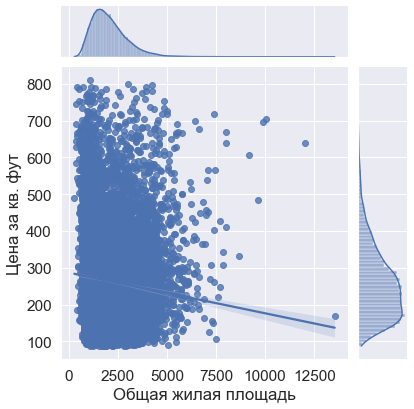

In [102]:
sns.jointplot(x=house_data_df['sqft_living'], y=house_data_df['price_per_sq_foot'], kind='reg')
plt.xlabel('Общая жилая площадь')
plt.ylabel('Цена за кв. фут')
plt.show();

Зависимость неявная - цена за квадратный фут может быть любой, лишь просматривается общая зависимость: чем больше дом, тем дешевле квадратный фут

Возьмем среднюю цену за фут в разбивке по общей оценке дома

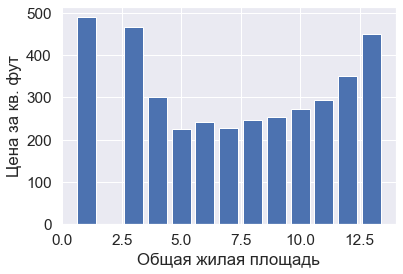

In [47]:
data = house_data_df.groupby('grade')['price_per_sq_foot'].agg(median_sqft_price='median').reset_index()
plt.bar(data['grade'], data['median_sqft_price'])
plt.xlabel('Общая оценка дома')
plt.ylabel('Цена за кв. фут')
plt.show();

Наблюдается интересный феномен: дешевле всего покупать дома со средней оценкой.<rb>
Удивительно также, что некоторые дома с плохой оценкой стоят дороже лучших домов (в пересчете на кв фут)

Оптимально покупать дома с оценкой 6 и выше и с ценой за кв. фут не более 275 долл

In [103]:
data = house_data_df[(house_data_df['grade'] >= 6) & (house_data_df['price_per_sq_foot'] <= 250)][['lat', 'long']]
data.rename(columns={'lat': 'latitude', 'long': 'longitude'}, inplace=True)

In [104]:
from shapely.geometry import Point

In [105]:
data['geometry'] = data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
data

,latitude,longitude,geometry
0,47.5112,-122.257,POINT (-122.257 47.5112)
1,47.7210,-122.319,POINT (-122.319 47.721)
2,47.7379,-122.233,POINT (-122.233 47.7379)
5,47.6561,-122.005,POINT (-122.005 47.6561)
6,47.3097,-122.327,POINT (-122.327 47.3097)
...,...,...,...
21603,47.5389,-121.881,POINT (-121.881 47.5389)
21605,47.5137,-122.167,POINT (-122.167 47.5137)
21608,47.6993,-122.346,POINT (-122.346 47.6993)
21609,47.5107,-122.362,POINT (-122.362 47.5107)


In [106]:
import folium

In [111]:
this_map = folium.Map(prefer_canvas=True)
for index, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup='House',
        icon=folium.Icon(icon='cloud')
    ).add_to(this_map)

this_map